In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv(r'C:\Users\kamak\Downloads\UScomments.csv',error_bad_lines=False)

C:\Users\kamak\AppData\Local\Temp\ipykernel_24368\3567352306.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'C:\Users\kamak\Downloads\UScomments.csv',error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\kamak\AppData\Local\Temp\ipykernel_24368\3567352306.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'C:\Users\kamak\Downloads\UScomments.csv',error_bad_lines=False)


In [22]:
#SENTIMENT ANALYSIS OF VIEWERS

In [3]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [4]:
comments.dropna(inplace=True)

In [5]:
!pip install textblob

In [6]:
from textblob import TextBlob

In [7]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [8]:
df = comments[0:10000]
df

video_id                                       comment_text likes  \
0     XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1     XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2     XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3     XpVt6Z1Gjjo                                MY FAN . attendance     3   
4     XpVt6Z1Gjjo                                         trending 😉     3   
...           ...                                                ...   ...   
9995  lwOQbMcXtfU  Will it be a desert or will the water come bac...     0   
9996  lwOQbMcXtfU     All the people saying a Tsunami is coming... 🙄     0   
9997  lwOQbMcXtfU              Lools like the glowing sea in fallout     0   
9998  lwOQbMcXtfU                     The Simpsons were right again!     0   
9999  lwOQbMcXtfU                              So is the water back?     0   

     replies  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       0  
9998       0  
9999       0  

[10000 rows x 4 columns]

In [9]:
polarity = []
for comment in comments['comment_text']:
    polarity.append(TextBlob(comment).sentiment.polarity)
    
    
        
    

In [10]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [11]:
comments['polarity']=polarity

In [12]:
comments.head(20)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
16  XpVt6Z1Gjjo  Ayyyyoooo Logang what up .  This was a hard vl...     1   
17  XpVt6Z1Gjjo  Bro y didnt u give merch to johannes he is ur ...     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   
19  XpVt6Z1Gjjo             Made a lot of people hate youtube - GJ     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000  
15       0  0.800000  
16       0 -0.291667  
17       0  0.000000  
18       0  0.250000  
19       0 -0.800000

In [53]:
#WORDCLOUD REPRESENTATION OF SENTIMENTS

In [59]:
#wordcloud of positive and negative comments

comments_positive = comments[comments['polarity']==1]
comments_negative = comments[comments['polarity']==-1]

In [60]:
#installing wordcloud
!pip install wordcloud

In [61]:
from wordcloud import WordCloud, STOPWORDS

In [62]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [63]:
total_comments= ' '.join(comments_negative['comment_text'])

In [64]:
total_comments2= ' '.join(comments_positive['comment_text'])

In [65]:
total_comments[0:200]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?"

In [66]:
total_comments2[0:200]

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford"

(-0.5, 399.5, 199.5, -0.5)

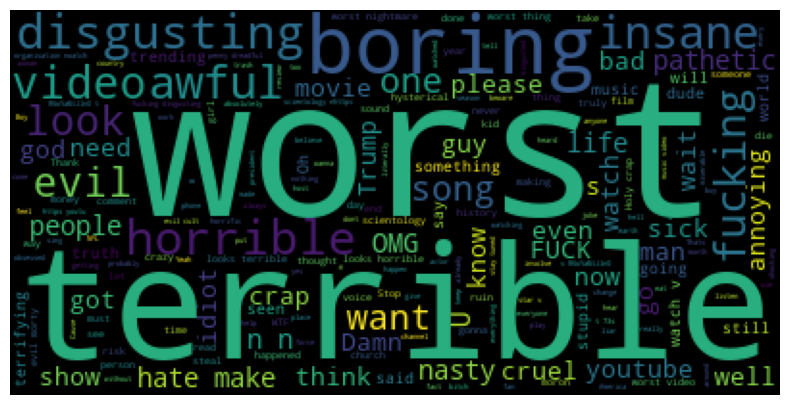

In [67]:
wordcloud = WordCloud(stopwords =set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

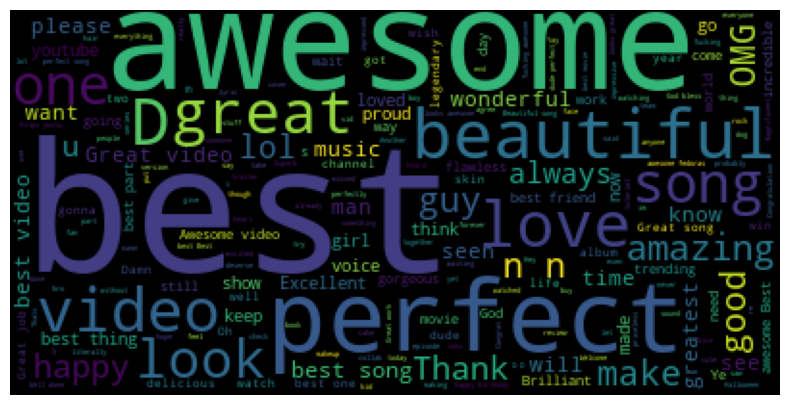

In [68]:
wordcloud = WordCloud(stopwords =set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
#EMOJI ANALYSIS


In [148]:
!pip install emoji

In [166]:
import emoji

In [167]:
comments.head(20)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
16  XpVt6Z1Gjjo  Ayyyyoooo Logang what up .  This was a hard vl...     1   
17  XpVt6Z1Gjjo  Bro y didnt u give merch to johannes he is ur ...     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   
19  XpVt6Z1Gjjo             Made a lot of people hate youtube - GJ     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000  
15       0  0.800000  
16       0 -0.291667  
17       0  0.000000  
18       0  0.250000  
19       0 -0.800000

In [168]:
emoji_list = []
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [169]:
emoji_list[0:20]

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻']

In [170]:
from collections import Counter

In [171]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [172]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [173]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [174]:
freq = [Counter(emoji_list).most_common(10)[i][1]for i in range(10)]

In [175]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [176]:
#to plot the graph
!pip install plotly

In [177]:
import plotly.graph_objs as go

In [178]:
from plotly.offline import iplot

In [179]:
trace=go.Bar(x=emojis,y=freq)
iplot([trace])

In [68]:
path = 'C:/Users/kamak/Downloads/additional_data-20230327T032246Z-001/additional_data'

In [69]:
import os

In [72]:
files = os.listdir(path)

In [73]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [78]:
for i in range(1,len(files),2):
    print(i)

1
3
5
7
9
11
13
15
17
19


In [84]:
files_csv = [files[i] for i in range(0,len(files),2)]

In [85]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [91]:
files_csv[0].split(',')[0][0:2]

'CA'

In [95]:
full_df = pd.DataFrame()
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines = False)
    current_df['Country']=file.split(',')[0][0:2]
    full_df = pd.concat([full_df,current_df])

C:\Users\kamak\AppData\Local\Temp\ipykernel_24368\1471224028.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\kamak\AppData\Local\Temp\ipykernel_24368\1471224028.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\kamak\AppData\Local\Temp\ipykernel_24368\1471224028.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\kamak\AppData\Local\Temp\ipykernel_24368\1471224028.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\kamak\AppData\Local\Temp\ipykernel_24368\1471224028.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future vers

In [96]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description Country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA

In [97]:
full_df.shape

(375942, 17)

In [98]:
####          ANALYZING THE MOST LIKES CATAGORY


In [99]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [116]:
cat = pd.read_csv("C:/Users/kamak/Downloads/category_file.txt",sep=":")

In [117]:
cat

Category_id      Category_name
1            \t\tFilm & Animation
2            \t\tAutos & Vehicles
10                      \t\tMusic
15             \t\tPets & Animals
17                     \t\tSports
18               \t\tShort Movies
19            \t\tTravel & Events
20                     \t\tGaming
21              \t\tVideoblogging
22             \t\tPeople & Blogs
23                     \t\tComedy
24              \t\tEntertainment
25            \t\tNews & Politics
26              \t\tHowto & Style
27                  \t\tEducation
28       \t\tScience & Technology
29      \t\tNonprofits & Activism
30                     \t\tMovies
31            \t\tAnime/Animation
32           \t\tAction/Adventure
33                   \t\tClassics
34                     \t\tComedy
35                \t\tDocumentary
36                      \t\tDrama
37                     \t\tFamily
38                    \t\tForeign
39                     \t\tHorror
40             \t\tSci-Fi/Fantasy
41                   \t\tThriller
42                     \t\tShorts
43                      \t\tShows
44       \t\tTrailers

In [118]:
cat.reset_index(inplace = True)

In [119]:
cat.columns=['category_id','category_name']

In [120]:
cat

category_id               category_name
0             1        \t\tFilm & Animation
1             2        \t\tAutos & Vehicles
2            10                   \t\tMusic
3            15          \t\tPets & Animals
4            17                  \t\tSports
5            18            \t\tShort Movies
6            19         \t\tTravel & Events
7            20                  \t\tGaming
8            21           \t\tVideoblogging
9            22          \t\tPeople & Blogs
10           23                  \t\tComedy
11           24           \t\tEntertainment
12           25         \t\tNews & Politics
13           26           \t\tHowto & Style
14           27               \t\tEducation
15           28    \t\tScience & Technology
16           29   \t\tNonprofits & Activism
17           30                  \t\tMovies
18           31         \t\tAnime/Animation
19           32        \t\tAction/Adventure
20           33                \t\tClassics
21           34                  \t\tComedy
22           35             \t\tDocumentary
23           36                   \t\tDrama
24           37                  \t\tFamily
25           38                 \t\tForeign
26           39                  \t\tHorror
27           40          \t\tSci-Fi/Fantasy
28           41                \t\tThriller
29           42                  \t\tShorts
30           43                   \t\tShows
31           44    \t\tTrailers

In [123]:
cat.set_index('category_id',inplace = True)


In [126]:
dct =cat.to_dict()

In [127]:
dct['category_name']

{1: ' \t\tFilm & Animation',
 2: ' \t\tAutos & Vehicles',
 10: ' \t\tMusic',
 15: ' \t\tPets & Animals',
 17: ' \t\tSports',
 18: ' \t\tShort Movies',
 19: ' \t\tTravel & Events',
 20: ' \t\tGaming',
 21: ' \t\tVideoblogging',
 22: ' \t\tPeople & Blogs',
 23: ' \t\tComedy',
 24: ' \t\tEntertainment',
 25: ' \t\tNews & Politics',
 26: ' \t\tHowto & Style',
 27: ' \t\tEducation',
 28: ' \t\tScience & Technology',
 29: ' \t\tNonprofits & Activism',
 30: ' \t\tMovies',
 31: ' \t\tAnime/Animation',
 32: ' \t\tAction/Adventure',
 33: ' \t\tClassics',
 34: ' \t\tComedy',
 35: ' \t\tDocumentary',
 36: ' \t\tDrama',
 37: ' \t\tFamily',
 38: ' \t\tForeign',
 39: ' \t\tHorror',
 40: ' \t\tSci-Fi/Fantasy',
 41: ' \t\tThriller',
 42: ' \t\tShorts',
 43: ' \t\tShows',
 44: ' \t\tTrailers            '}

In [132]:
full_df['category_name']=full_df['category_id'].map(dct['category_name'])

In [133]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Country', 'category_name'],
      dtype='object')

In [134]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description Country  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA   
1  STill got a lot of packages. Probably will las...      CA   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA   
3  I know it's been a while since we did this sho...      CA   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA   

        category_name  
0           \t\tMusic  
1          \t\tComedy  
2          \t\tComedy  
3   \t\tEntertainment  
4           \t\tMusic

<AxesSubplot:xlabel='category_name', ylabel='likes'>

C:\Users\kamak\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



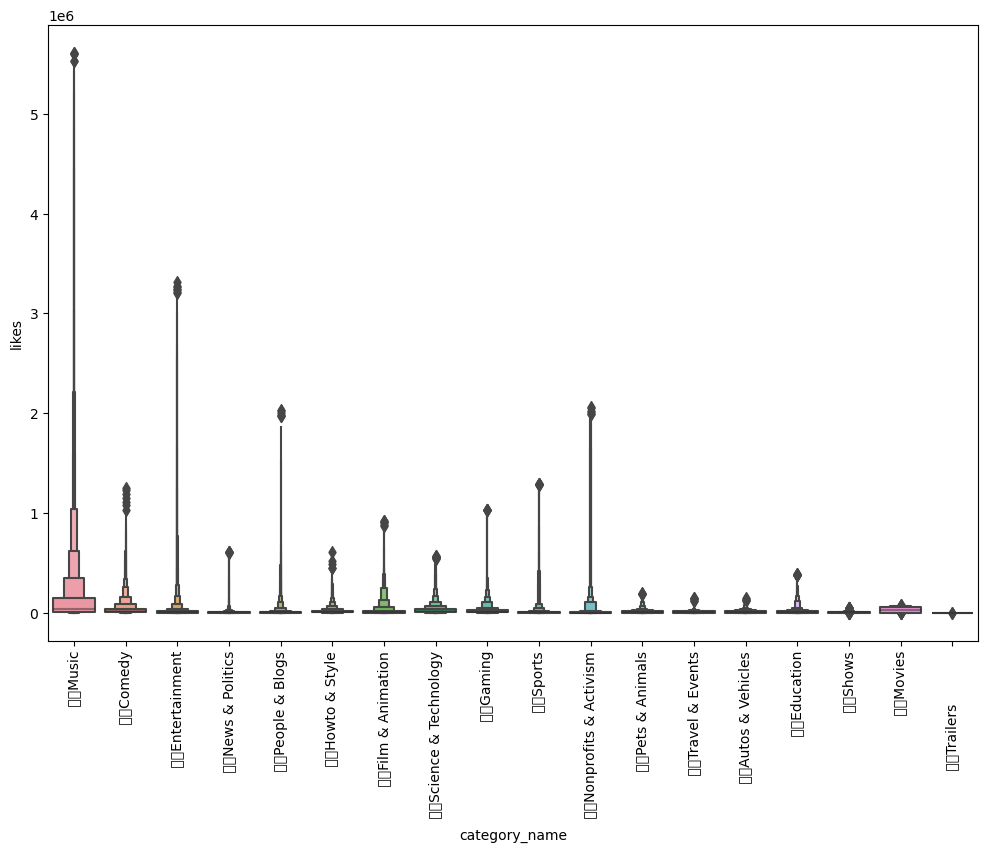

In [135]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
sns.boxenplot(x='category_name',y='likes',data=full_df)

In [136]:
#         Analyzing the engagement of audience

In [137]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Country', 'category_name'],
      dtype='object')

In [138]:
full_df['like_rate']= (full_df['likes']/full_df['views'])*100
full_df['dislike_rate']= (full_df['dislikes']/full_df['views'])*100
full_df['comment_rate']= (full_df['comment_count']/full_df['views'])*100


In [140]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description Country  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA   
1  STill got a lot of packages. Probably will las...      CA   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA   
3  I know it's been a while since we did this sho...      CA   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA   

        category_name  like_rate  dislike_rate  comment_rate  
0           \t\tMusic   4.589104      0.253051      0.733639  
1          \t\tComedy  12.594873      0.166363      1.284185  
2          \t\tComedy   4.575843      0.167292      0.256342  
3   \t\tEntertainment   6.309630      0.094903      0.835851  
4           \t\tMusic   4.874563      0.062887      0.253752  

[5 rows x 21 columns]

<AxesSubplot:xlabel='category_name', ylabel='like_rate'>

C:\Users\kamak\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



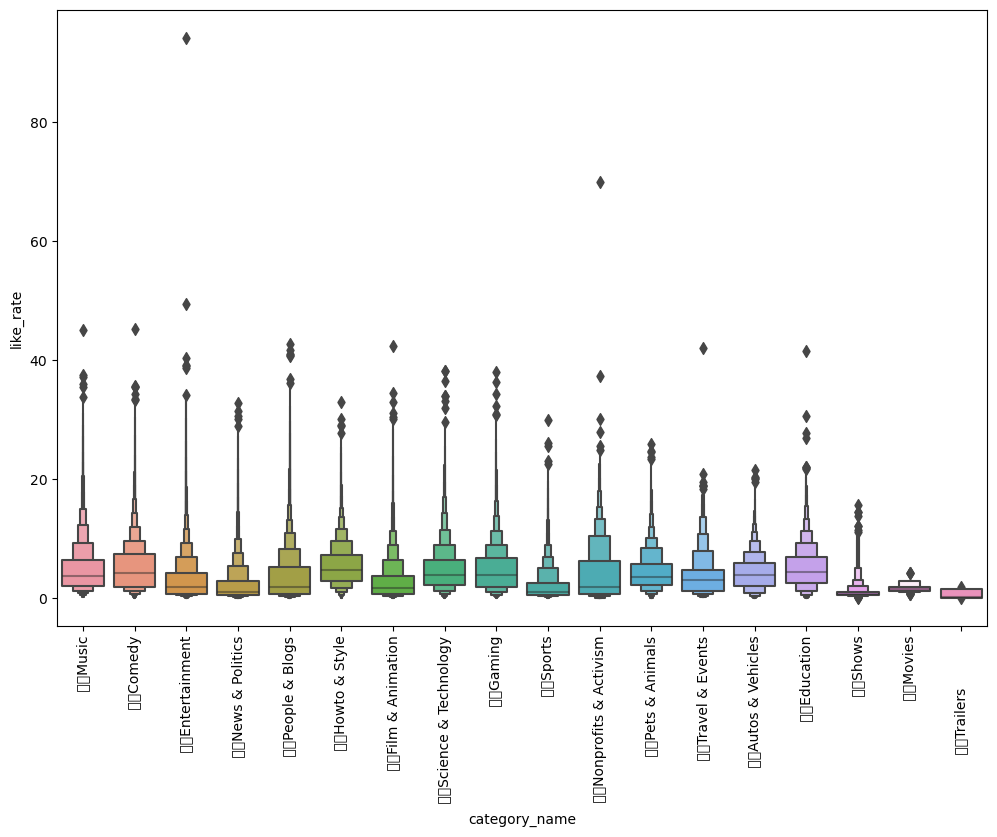

In [142]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
sns.boxenplot(x='category_name',y='like_rate',data=full_df)

<AxesSubplot:xlabel='category_name', ylabel='dislike_rate'>

C:\Users\kamak\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



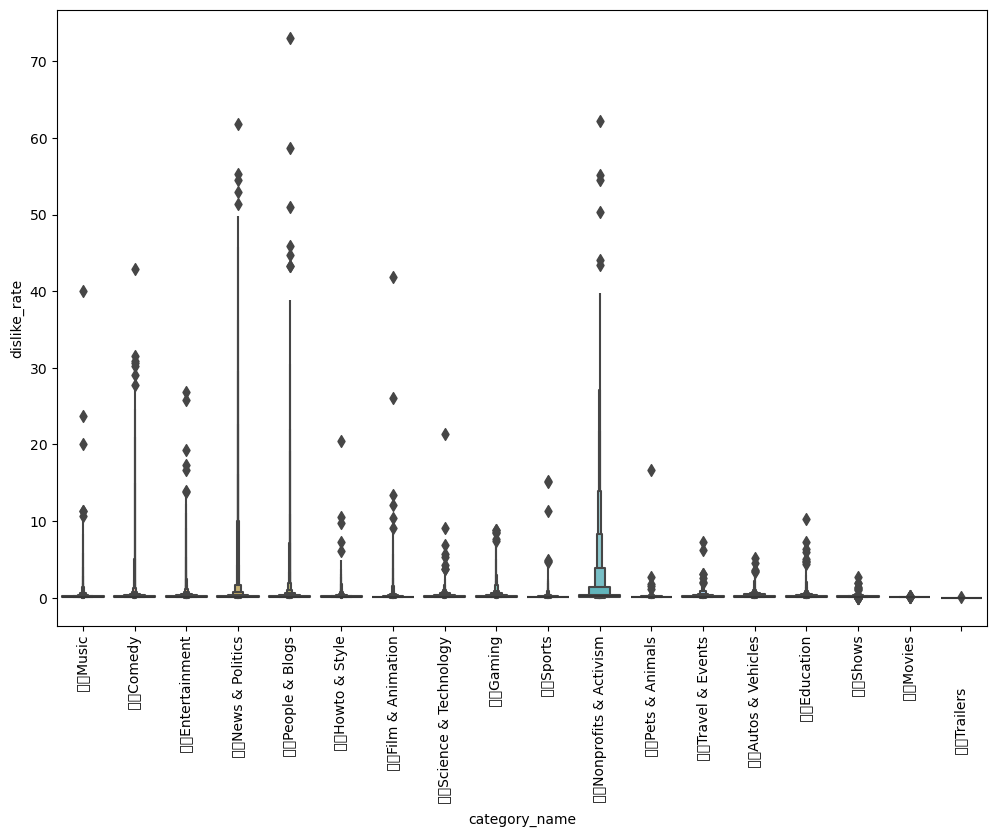

In [143]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
sns.boxenplot(x='category_name',y='dislike_rate',data=full_df)

<AxesSubplot:xlabel='category_name', ylabel='comment_rate'>

C:\Users\kamak\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



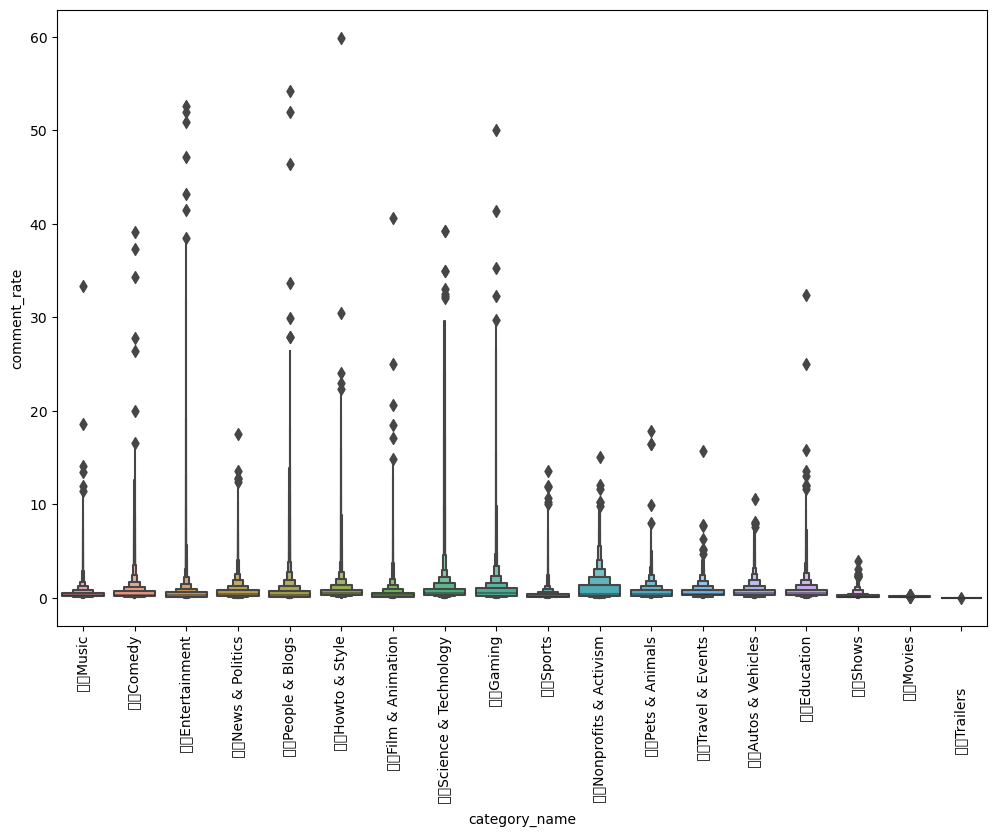

In [144]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
sns.boxenplot(x='category_name',y='comment_rate',data=full_df)

<AxesSubplot:xlabel='views', ylabel='likes'>

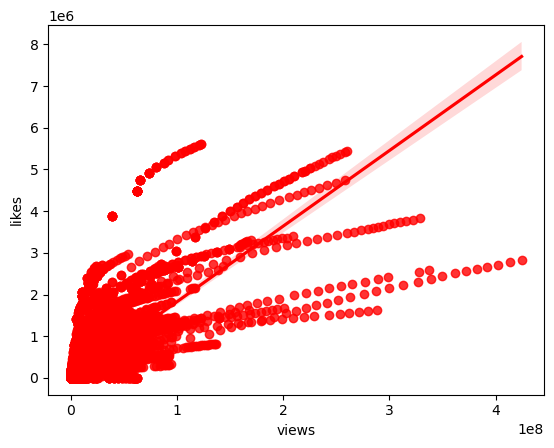

In [147]:
sns.regplot(data =full_df,x='views',y='likes',color='r')

<AxesSubplot:>

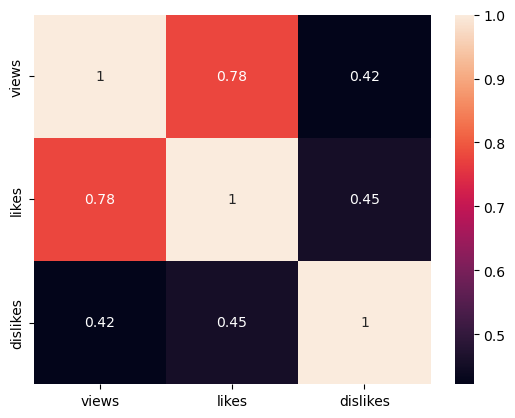

In [163]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)

In [180]:
#       ANALYZING THE CHANNEL WITH MOST VIDEOS

In [181]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   

                                         description Country category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA     \t\tMusic   
1  STill got a lot of packages. Probably will las...      CA    \t\tComedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA    \t\tComedy   

   like_rate  dislike_rate  comment_rate  
0   4.589104      0.253051      0.733639  
1  12.594873      0.166363      1.284185  
2   4.575843      0.167292      0.256342  

[3 rows x 21 columns]

In [183]:
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame().reset_index().rename(columns={'video_id':'total_video'})

In [184]:
cdf

channel_title  total_video
0      The Late Show with Stephen Colbert          984
1                                     WWE          804
2             Late Night with Seth Meyers          773
3                               VikatanTV          763
4                            TheEllenShow          743
...                                   ...          ...
37819                   LIGHTS - 001 jrny            1
37820                          bangtanist            1
37821                      LIGAMX Femenil            1
37822             LIGA COLOMBIANA OFICIAL            1
37823                    Pavel Sidorik TV            1

[37824 rows x 2 columns]

In [185]:
import plotly.express as px

In [189]:
import plotly.offline as pyo
pyo.init_notebook_mode()

In [187]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_video')